In [1]:
import os

# EOReader
from eoreader.reader import Reader
from eoreader.bands import GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE, to_str
from eoreader.env_vars import DEM_PATH

In [2]:
# Create logger
import logging
from sertit import logs

logger = logging.getLogger("eoreader")
logs.init_logger(logger)

In [3]:
# Set a DEM
os.environ[DEM_PATH] = os.path.join(
    "/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL",
    "MERIT_Hydrologically_Adjusted_Elevations", "MERIT_DEM.vrt"
)

# Open your product
path = os.path.join("/home", "data", "DATA", "PRODS", "PLEIADES", "5547047101", "IMG_PHR1A_PMS_001")
reader = Reader()
prod = reader.open(path, remove_tmp=True)
prod

eoreader.PldProduct 'PHR1A_PMS_202005110231585_ORT_5547047101'
Attributes:
	condensed_name: 20200511T023158_PLD_ORT_PMS_5547047101
	path: /home/data/DATA/PRODS/PLEIADES/5547047101/IMG_PHR1A_PMS_001
	constellation: Pleiades
	sensor type: Optical
	product type: Ortho Single Image
	default resolution: 0.5
	acquisition datetime: 2020-05-11T02:31:58
	band mapping:
		BLUE: 3
		GREEN: 2
		RED: 1
		NIR: 4
		NARROW_NIR: 4
	needs extraction: False
	cloud cover: 0.0

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/conda/lib/python3.10/site-packages/rioxarray/_io.py:1126: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


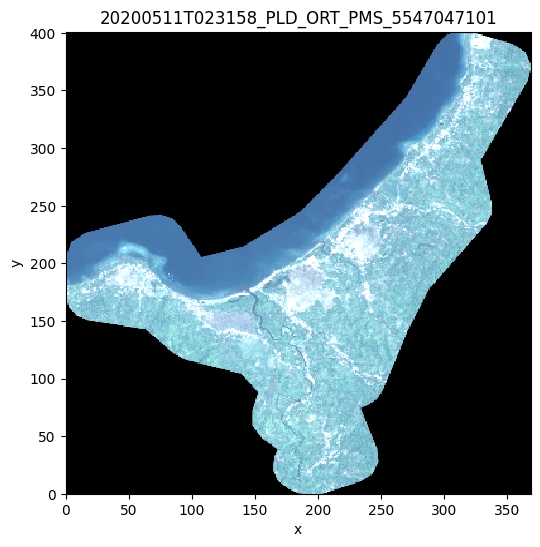

In [4]:
# Plot the quicklook
prod.plot()

In [5]:
# Get the bands information
prod.bands

eoreader.SpectralBand 'RED'
Attributes:
	id: 1
	eoreader_name: RED
	common_name: red
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 650.0
	Bandwidth (nm): 120.0
eoreader.SpectralBand 'GREEN'
Attributes:
	id: 2
	eoreader_name: GREEN
	common_name: green
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 560.0
	Bandwidth (nm): 120.0
eoreader.SpectralBand 'BLUE'
Attributes:
	id: 3
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 495.0
	Bandwidth (nm): 70.0
eoreader.SpectralBand 'NIR'
Attributes:
	id: 4
	eoreader_name: NIR
	common_name: nir
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 840.0
	Bandwidth (nm): 200.0
eoreader.SpectralBand 'NIR'
Attributes:
	id: 4
	eoreader_name: NIR
	common_name: nir
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 840.0
	Bandwidth (nm): 200.0

In [6]:
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

Acquisition datetime: 2020-05-11 02:31:58
Condensed name: 20200511T023158_PLD_ORT_PMS_5547047101


<Axes: >

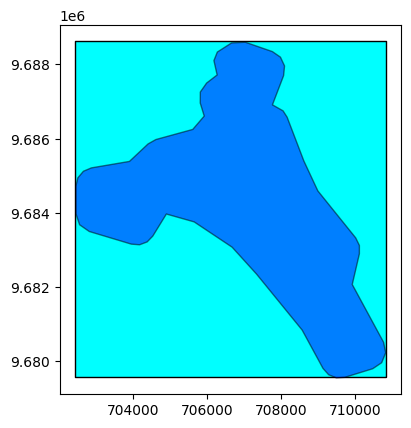

In [7]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [8]:
# Select the bands you want to load
bands = [GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE]

# Be sure they exist for Pleiades sensor
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Pleiades doesn't provide TIR and SHADOWS bands

['GREEN', 'NDVI', 'CLOUDS', 'HILLSHADE']


In [9]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

2023-03-22 14:56:33,432 - [DEBUG] - Loading bands ['GREEN', 'NIR', 'RED']


2023-03-22 14:56:33,436 - [DEBUG] - Read GREEN


2023-03-22 14:56:33,462 - [INFO] - Warping stack to UTM with a 0.5 m resolution.


2023-03-22 14:56:33,526 - [DEBUG] - Reading warped GREEN.


2023-03-22 14:56:33,572 - [DEBUG] - Manage nodata for band GREEN


2023-03-22 14:56:34,417 - [DEBUG] - Converting GREEN to reflectance


2023-03-22 14:57:33,390 - [DEBUG] - Read NIR


2023-03-22 14:57:33,414 - [INFO] - Warping stack to UTM with a 0.5 m resolution.


2023-03-22 14:57:33,460 - [DEBUG] - Reading warped NIR.


2023-03-22 14:57:33,502 - [DEBUG] - Manage nodata for band NIR


2023-03-22 14:57:34,379 - [DEBUG] - Converting NIR to reflectance


2023-03-22 14:58:34,905 - [DEBUG] - Read RED


2023-03-22 14:58:34,927 - [INFO] - Warping stack to UTM with a 0.5 m resolution.


2023-03-22 14:58:34,972 - [DEBUG] - Reading warped RED.


2023-03-22 14:58:35,006 - [DEBUG] - Manage nodata for band RED


2023-03-22 14:58:35,863 - [DEBUG] - Converting RED to reflectance


2023-03-22 14:59:37,853 - [DEBUG] - Loading indices ['NDVI']


2023-03-22 15:01:49,909 - [DEBUG] - Loading DEM bands ['HILLSHADE']


2023-03-22 15:01:49,910 - [DEBUG] - Warping DEM for 20200511T023158_PLD_ORT_PMS_5547047101


2023-03-22 15:01:49,911 - [DEBUG] - Using DEM: /home/data/DS2/BASES_DE_DONNEES/GLOBAL/MERIT_Hydrologically_Adjusted_Elevations/MERIT_DEM.vrt


2023-03-22 15:01:50,011 - [DEBUG] - Computing hillshade DEM for PHR1A_PMS_202005110231585_ORT_5547047101


2023-03-22 15:02:22,492 - [DEBUG] - Loading Cloud bands ['CLOUDS']


<xarray.DataArray 'GREEN' (band: 1, y: 18124, x: 16754)>
dask.array<clip, shape=(1, 18124, 16754), dtype=float32, chunksize=(1, 2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 2
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.108e+05 7.108e+05
  * y            (y) float64 9.689e+06 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
    spatial_ref  int64 0
Attributes: (12/13)
    long_name:         GREEN
    constellation:     Pleiades
    constellation_id:  PLD
    product_path:      /home/data/DATA/PRODS/PLEIADES/5547047101/IMG_PHR1A_PM...
    product_name:      PHR1A_PMS_202005110231585_ORT_5547047101
    product_filename:  IMG_PHR1A_PMS_001
    ...                ...
    product_type:      Ortho Single Image
    acquisition_date:  20200511T023158
    condensed_name:    20200511T023158_PLD_ORT_PMS_5547047101
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       0.0

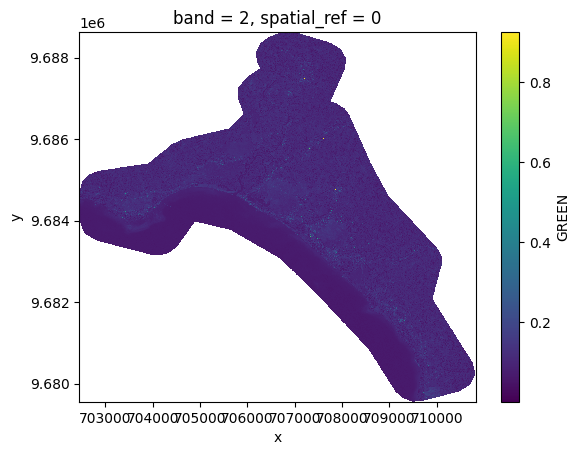

In [10]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

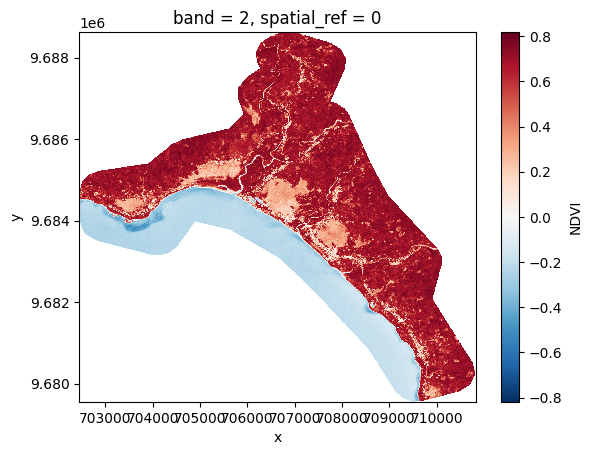

In [11]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

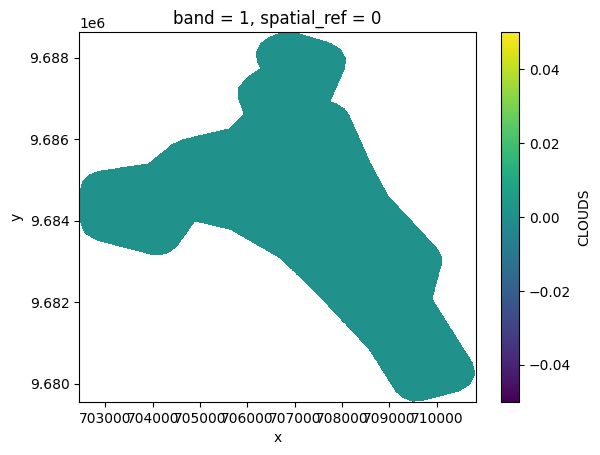

In [12]:
# Plot a subsampled version
band_dict[CLOUDS][:, ::10, ::10].plot()

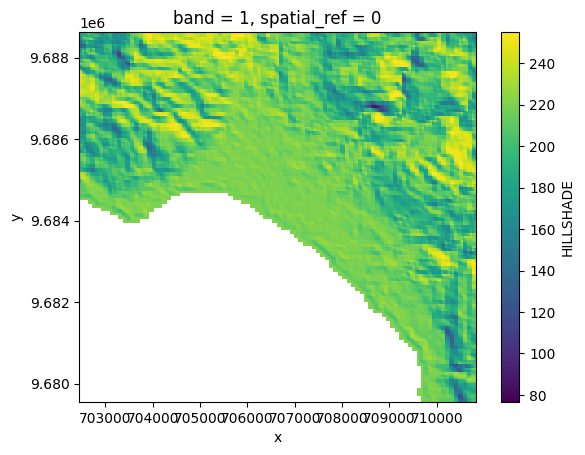

In [13]:
# Plot a subsampled version
band_dict[HILLSHADE][:, ::10, ::10].plot()

In [14]:
# You can also stack those bands
stack = prod.stack(ok_bands)

2023-03-22 15:07:03,470 - [DEBUG] - Loading bands ['GREEN', 'NIR', 'RED']


2023-03-22 15:07:03,471 - [DEBUG] - Read GREEN


2023-03-22 15:07:04,011 - [DEBUG] - Read NIR


2023-03-22 15:07:04,029 - [DEBUG] - Read RED


2023-03-22 15:07:04,047 - [DEBUG] - Loading indices ['NDVI']


2023-03-22 15:07:04,063 - [DEBUG] - Loading DEM bands ['HILLSHADE']


2023-03-22 15:07:04,064 - [DEBUG] - Already existing DEM for 20200511T023158_PLD_ORT_PMS_5547047101. Skipping process.


2023-03-22 15:07:04,064 - [DEBUG] - Already existing hillshade DEM for PHR1A_PMS_202005110231585_ORT_5547047101. Skipping process.


2023-03-22 15:07:04,081 - [DEBUG] - Loading Cloud bands ['CLOUDS']


2023-03-22 15:07:04,101 - [DEBUG] - Stacking


2023-03-22 15:07:04,123 - [DEBUG] - Saving stack


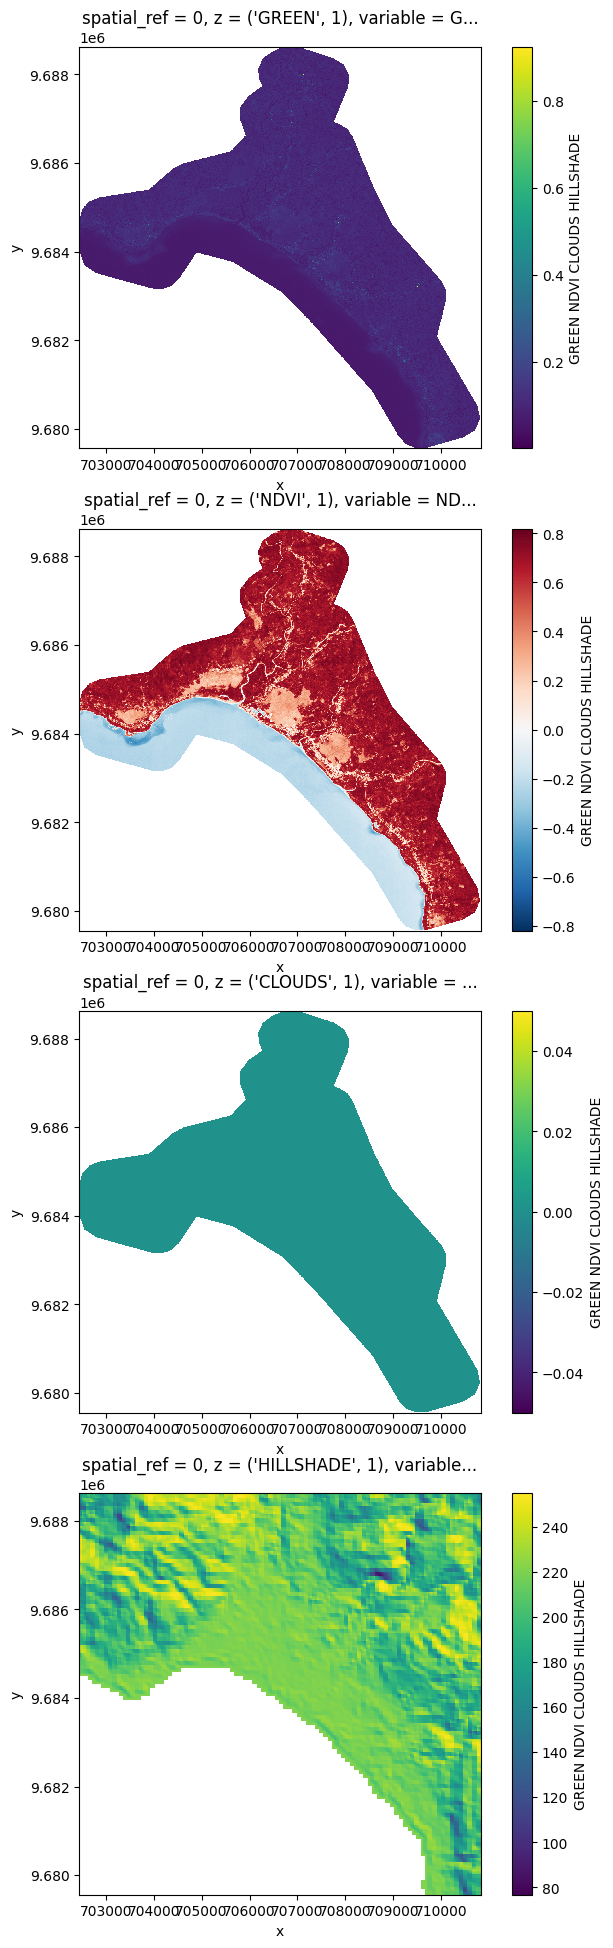

In [15]:
# Plot a subsampled version
import matplotlib.pyplot as plt

nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})

for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])